__Agenda__

- Difference between population and sample
- How can we get a good sample?
- Point estimators from sample
- Sampling distribution, especially sampling distribution of the mean
- Central Limit Theorem - statement and use of it.
- Creating confidence intervals around sample mean using CLT
- Recap


# Sampling Distributions

## Population vs Sample

__population__ A population is the set of all elements of interest in a study. (Finite population and infinite population)

__sample__ A sample is a subset of the population.

### Scenario

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine out what proportion of the population of DC owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.

Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population

![pop](./img/sample_pop.png)


**Random sampling is not easy to do, let's look at an example:**

Imagine you are trying to determine what proportion of DC metro area people own a car

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car


__Objective of Sampling__

When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.


## Point Estimates

!! Very important observation!!: We can consider random sampling as an 'random experiment' and then when we calculate mean, variance, standard deviation, median etc. these are functions on the outcomes of this experiment. We have a name for such functions can you remember it?

![imgsample](./img/sample_stats.png)

### It's your turn :)

[Download data](https://www.kaggle.com/ishaanv/ISLR-Auto)

[UCI-repo](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

In [15]:
import pandas as pd 

import numpy as np

auto  = pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Take a random sample of 30 cars from auto dataset and find both sampling and population mean and standard deviation. 



In [2]:
auto.shape

(392, 9)

In [16]:
# %load -r 1-5 supplement.py
sampled_data = auto.sample(n = 20, random_state=110719)
x_bar = sampled_data.mpg.mean()
mu = auto.mpg.mean()

s_hat = sampled_data.mpg.std()
sigma = auto.mpg.std(ddof = 0 )

In [17]:
print("""Sampling mean is {} 
        \nPopulation mean is {}\n""".format(x_bar, mu))

print("""Sampling std is {} 
        \nPopulation std is {}""".format(s_hat, sigma))

Sampling mean is 22.869999999999997 
        
Population mean is 23.44591836734694

Sampling std is 10.543149434585475 
        
Population std is 7.795045762682584


The difference between the sample mean and the population mean is known as the **Sampling Error**.  

>When using the sample mean to estimate the population mean, some possible error will be involved since random sample means are also random.

### It's your turn again :)

Repeat the sampling process you did above 1000 times and plot the result.

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

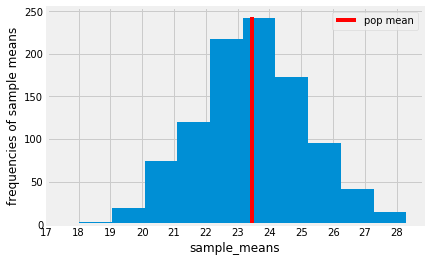

In [19]:
# %load -r 9-22 supplement.py
# taking repeating samples from auto dataset
thousand_rand_samp = [auto.sample(n = 20).mpg.mean() for i in range(1000)]

bars = plt.hist(thousand_rand_samp)

plt.vlines(x = mu, ymin= 0,
           ymax = bars[0].max() +1,
           color = 'r', label = 'pop mean')
plt.xticks(range(17,29))
plt.xlabel('sample_means')
plt.ylabel('frequencies of sample means')

plt.legend()
plt.show()

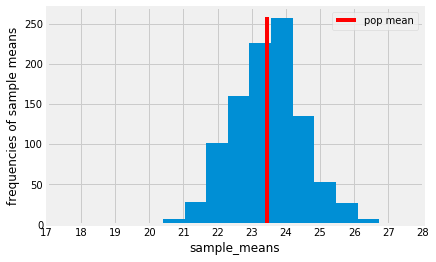

In [20]:
thousand_rand_samp = [auto.sample(n = 50).mpg.mean() for i in range(1000)]

bars = plt.hist(thousand_rand_samp)

plt.vlines(x = mu, ymin= 0,
           ymax = bars[0].max() +1,
           color = 'r', label = 'pop mean')
plt.xticks(range(17,29))
plt.xlabel('sample_means')
plt.ylabel('frequencies of sample means')

plt.legend()
plt.show()

# Central Limit Theorem

The Central Limit Theorem states: 
>When you add **a large number** of independent random variables, irrespective of the original distribution of these variables, **their sampling mean distribution tends towards a normal distribution** with mean equals to the mean of the original population and the standard deviation equals to $\frac{\sigma}{\sqrt{n}}$.





The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for the fact that in order to make our estimate of the $\mu$ value possible. Let's break it down:

## Standard Error

$$\sigma _{\bar{X}} = \frac{\sigma }{\sqrt{n}}$$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population


**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate for it by used the sample standard deviation.

$\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

But in this case, distribution shape is not 'normal' anymore. In this case the shape will be call 'T-distribution'. We will study this later in more details.


**Sample size impact on standard error of mean**<br>

Q: How should sample size influence standard error of the mean?


![error](./img/diminishing_error.png)
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


__Note-1__ In the case of finite sampling, we need to adjust the formula for standard error:

<img src="img/standard_deviation_of_x_bar.png" width="650">


__Note-2__ Note that in CLT the shape of initial distribution is not important! With enough sample size we can always achieve a distribution very close to normal one.

<img src="img/clt_with_different.png" width="650">


## Interval Estimation - Confidence Intervals

Q: Let's assume that we have a sample of size=49 and we know the standard deviation of the population is $\sigma = 5$. If we know that sampling mean is $\bar{x} = 20$. What might be a good estimate for the population mean if we also know that the population mean is bigger than 20?

Hint: What do we mean by 'a good estimate'?

1.959963984540054


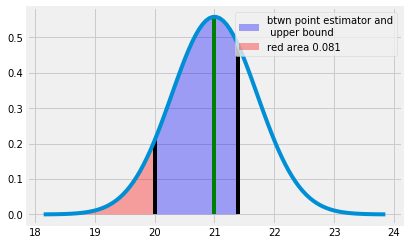

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
%matplotlib inline


#suppose population mu is 21
mu = 21
# sample mean gives us a point estimator
point_estimator = 20

# we know population variance is 49
std_error = 5/(np.sqrt(49))


# how much confidence do we require
confidence = 0.95

# alpha 
alpha = 1- confidence

# due to symmetry we divided alpha by 2
# note that to find z_alpha_over_2 we used 
# standard normal distribution

z_alpha_over_2 = np.abs(stats.norm.ppf(alpha/2))

print(z_alpha_over_2)


# upper bound gives us a value so that
# 2*(the area between point_estimator - upper_bound) = confidence

upper_bound = point_estimator + z_alpha_over_2* std_error

# now let's plot these

# a normal distribution with mean=mu and std=sigma
x = np.linspace(mu - 4*std_error, mu + 4*std_error, 100)
plt.plot(x, stats.norm.pdf(x, mu, std_error))

# a vertical line to mark point estimator
plt.vlines(point_estimator, ymin=0,
           ymax = stats.norm.pdf(point_estimator, mu, std_error))

# a vertical line for population mu
plt.vlines(mu, ymin=0,
           ymax = stats.norm.pdf(mu, mu, std_error),
          color = 'g')

# a vertical line for upper bound
plt.vlines(upper_bound, ymin=0,
           ymax = stats.norm.pdf(upper_bound, 
                                 mu, std_error))


# fill the area between upper_bound and point_estimator
plt.fill_between(x= np.linspace(point_estimator, upper_bound, 100), 
                 y1= stats.norm.pdf(np.linspace(point_estimator,
                                                upper_bound, 100), mu, std_error) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'btwn point estimator and\n upper bound')

# fill the area between point estimator and the left of it
plt.fill_between(x= np.linspace(mu - 4*std_error, point_estimator, 100), 
                 y1= stats.norm.pdf(np.linspace(mu - 4*std_error, point_estimator,100), mu, std_error) ,
                 facecolor='red',
                 alpha=0.35, 
                 label= 'red area %.3f'%(stats.norm.cdf(point_estimator, mu, std_error)))

plt.legend(loc = 'upper right')
plt.show()


[Z-scores](https://www.mathsisfun.com/data/standard-normal-distribution-table.html)

<img src="img/interval_estimation.png" width="650">

# Hypothesis Testing 

## The Analytical Question 

A data scientist wants to examine if there is an effect on IQ scores when using tutors. To analyze this, she conducts IQ tests on a sample of 40 students, and wants to compare her students' IQ to the general population IQ. The way an IQ score is structured, we know that a standardized IQ test has a mean of 100, and a standard deviation of 16. When she tests her group of students, however, she gets an average IQ of 103. Based on this finding, does tutoring make a difference?

## Step 1: State Your Hypotheses

### The Alternative Hypothesis ($H_a$)

The alternative hypothesis always reflects the idea or theory that needs to be tested. For this problem, you want to test if the tutoring has resulted in a significant increase in student IQ. So, you would write it down as:

> The sample mean is **significantly** bigger than the population mean

Again, significance is key here. If we denote sample mean as $\bar{x}$, and population mean as mu ($\mu$), you can write the alternative hypothesis as:

$$\large H_a\text{:   }\mu < \bar{x}$$

The alternative hypothesis here is that $\mu$ is less than $M$. In other situations, you could check for both possibilities of $\mu$ being smaller OR bigger than by checking  $\mu \neq M$. 

Maybe the tutoring results as a lower IQ... Who knows!

For now, you'll just check for the **significant increase**, for now, to keep the process simple.

### The Null Hypothesis ($H_0$)

For a one-sample z-test, you define your null hypothesis as there being **no significant difference** between specified sample and population. This means that under the null hypothesis, you assume that any observed (generally small) difference may be present due to sampling or experimental error. Considering this, for this problem, you can define a null hypothesis ($H_0$) as:

> There is **no significant difference** between the sample mean and population mean 

Remember the emphasis is on a _significant_ difference, rather than just any difference as a natural result of taking samples.

Denoting the sample mean as $M$, and the population mean as mu ($\mu$), you can write the null hypothesis as:

$$\large H_0\text{:   }\mu \geq \bar{x}$$


## Step 2: Specify a Significance Level (alpha)

Now that your hypotheses are in place, you have to decide on your significance level alpha ($\alpha$) as a cut-off value to define whether you can reject your null hypothesis or not.

As discussed previously, often, $\alpha$ is set to 0.05, which also has as a side-effect that there is a 5 percent chance that you will reject the null hypothesis when it is true.
Later, you'll see that using alpha, you'll formulate your test result as: "with a confidence level of 95%, we can state that...". For a z-distribution, this can be shown as below:

<img src="img/hypothesis_test.png" width=670>


If you test both sides of the distribution ($\mu \neq \bar{x}$, when $\mu$ can either be smaller OR bigger), you need to perform a 2-tail test to see if tutoring lowers OR highers the IQ of students.

Each red region would be calculated as $\dfrac{\alpha}{2}$. When testing of a single side (as in the example) i.e. just higher OR just lower, you can use a one-tail test as shown in the first and second images. The $\alpha$ value we use is 0.05 or $5\%$.

## Step 3: Calculate the test statistic

For z-tests, a z-statistic is used as our test statistic. You'll see other statistics suitable for other tests later. A one-sample z-statistic is calculated as:

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square square root of n to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". 

Let's use Python to calculate this. 